# Desci Token Network Distribution

The objective of this analysis is to determine the distribution of DESCI tokens across different L1 and L2 networks to provide actionable insights towards Bitcoin University's smart contract architecture design considerations. The JSON data `~/token-network-distribution/data/20251119.json` was manually collected from [CoinMarketCap](https://coinmarketcap.com/view/desci/) on November 19, 2025.

## Table of Contents

1. [Setup and Data Import](#1-setup-and-data-import)
   - [Imports](#11-imports)
   - [Data Loading](#12-data-loading)
2. [L1 and L2 Network Distribution Analysis](#2-l1-and-l2-network-distribution-analysis)
   - [Data Preparation](#21-data-preparation)
   - [Token Count](#22-token-count)
   - [Plot Visualization](#23-plot-visualization)
   - [Token-Network Matrix (Multi-Network Distribution)](#24-token-network-matrix-multi-network-distribution)
3. [Wallet Distribution Analysis](#3-wallet-distribution-analysis)
   - [Data Preparation](#31-data-preparation)
   - [Plot Visualization](#32-plot-visualization)
   - [Network-Wallet Heatmap Analysis](#33-network-wallet-heatmap-analysis)
4. [Auditor Distribution Analysis](#4-auditor-distribution-analysis)
   - [Data Preparation](#41-data-preparation)
   - [Plot Visualization](#42-plot-visualization)
5. [Social Media Distribution Analysis](#5-social-media-distribution-analysis)
   - [Data Preparation](#51-data-preparation)
   - [Plot Visualization](#52-plot-visualization)
6. [Explorers Distribution Analysis](#6-explorers-distribution-analysis)
   - [Data Preparation](#61-data-preparation)
   - [Plot Visualization](#62-plot-visualization)


## 1. Setup and Data Import
### 1.1 Imports

In [ ]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [88]:
# change directory to the parent directory in python
# run this once
#os.chdir("../")
!pwd

/home/alice/git-repo/desci-analysis/token-network-distribution


### 1.2 Data Loading

In [131]:
# import data/20251119.json
with open("data/20251119.json", "r") as f:
    data = json.load(f)
print(data)

{'tokens': [{'name': 'OriginTrail', 'symbol': 'TRAC', 'contracts': [{'address': '0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f', 'network': 'ethereum'}, {'address': '0xeddd81e0792e764501aae206eb432399a0268db5', 'network': 'gnosis'}, {'address': '0xA81a52B4dda010896cDd386C7fBdc5CDc835ba23', 'network': 'base'}], 'wallets': ['metamask', 'binance', 'trust'], 'UCID': '2467', 'audits': ['quantstamp'], 'socials': ['x', 'reddit', 'github', 'facebook', 'telegram'], 'explorers': ['etherscan', 'nansen', 'ethplorer']}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'contracts': [{'address': '0xcb1592591996765ec0efc1f92599a19767ee5ffa', 'network': 'ethereum'}, {'address': 'bioJ9JTqW62MLz7UKHU69gtKhPpGi1BQhccj2kmSvUJ', 'network': 'solana'}, {'address': '0x226a2fa2556c48245e57cd1cba4c6c9e67077dd2', 'network': 'base'}], 'wallets': ['trust', 'solflare', 'backpack', 'phantom', 'binance', 'jupiter'], 'audits': [], 'UCID': '34812', 'socials': ['x', 'telegram', 'discord'], 'explorers': ['etherscan', 'nansen', 'sol

## 2. L1 and L2 Network Distribution Analysis

### 2.1 Data Preparation

In [132]:
# create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and network
# tokens can have multiple networks
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    # create row for each network
    name = token["name"]
    symbol = token["symbol"]
    for network in token["contracts"]:
        clean_data.append(
            {"name": name, "symbol": symbol, "network": network["network"]}
        )

print(clean_data[:10])
# convert list of dictionaries to dataframe
network_df = pd.DataFrame(clean_data)
network_df.head()

[{'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'ethereum'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'gnosis'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'base'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'ethereum'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'solana'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'base'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'network': 'solana'}, {'name': 'Pythia', 'symbol': 'PYTHIA', 'network': 'solana'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'network': 'ethereum'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'network': 'base'}]


,name,symbol,network
0,OriginTrail,TRAC,ethereum
1,OriginTrail,TRAC,gnosis
2,OriginTrail,TRAC,base
3,Bio Protocol,BIO,ethereum
4,Bio Protocol,BIO,solana


### 2.2 Token Count

In [171]:
# the number of unique tokens
print("The number of unique tokens is: ", len(network_df["name"].unique()))

The number of unique tokens is:  33


### 2.3 Plot Visualization

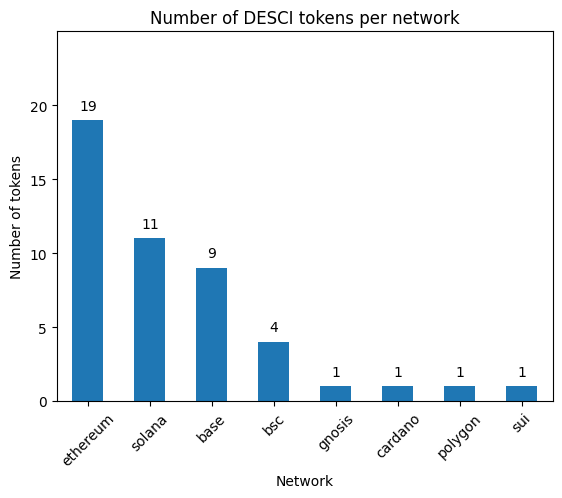

In [134]:
# create a bar chart of the number of tokens per network
network_df["network"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 25)
# y axis labels every 5
plt.yticks(range(0, 25, 5))
# add annotation to the bars
for i, v in enumerate(network_df["network"].value_counts()):
    plt.text(i, v + 0.5, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DESCI tokens per network")
plt.xlabel("Network")
plt.ylabel("Number of tokens")
plt.show()

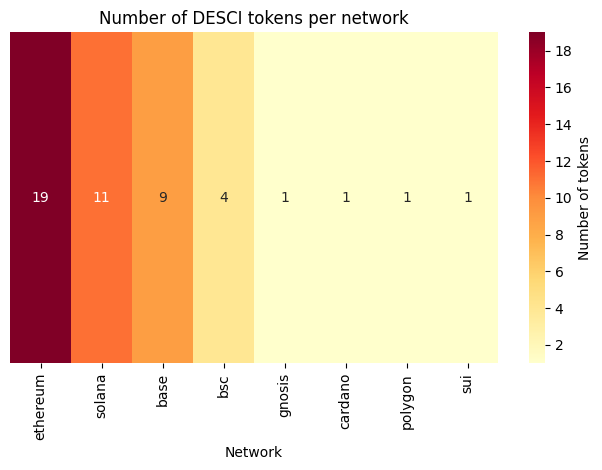

In [155]:
# create heatmap of the number of tokens per network
# Get value counts and reshape into a format suitable for heatmap
network_counts = network_df["network"].value_counts()
# Create a DataFrame with networks as columns and counts as a single row
heatmap_data = pd.DataFrame([network_counts.values], columns=network_counts.index)

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", cbar_kws={"label": "Number of tokens"})
plt.title("Number of DESCI tokens per network")
plt.xlabel("Network")
plt.ylabel("")
plt.yticks([])  # Remove y-axis ticks since we only have one row
plt.tight_layout()
plt.show()


### 2.4 Token-Network Matrix (Multi-Network Distribution)


In [166]:
# Create a matrix showing which tokens have smart contracts on which networks
# This demonstrates that tokens can have contracts on multiple networks

# Create a pivot table: tokens (rows) × networks (columns)
# Value is 1 if token has a contract on that network, 0 otherwise
token_network_matrix = network_df.pivot_table(
    index='name', 
    columns='network', 
    values='name', 
    aggfunc='count', 
    fill_value=0
)

# Convert to binary (1 = has contract, 0 = no contract)
token_network_matrix = (token_network_matrix > 0).astype(int)

print("Token-Network Matrix (1 = token has contract on network, 0 = no contract):")
print(f"\nTotal tokens: {len(token_network_matrix)}")
print(f"Total networks: {len(token_network_matrix.columns)}")
print(f"\nTokens with contracts on multiple networks:")
multi_network_tokens = token_network_matrix.sum(axis=1)
print(f"  - {len(multi_network_tokens[multi_network_tokens > 1])} tokens have contracts on 2+ networks")
print(f"  - {len(multi_network_tokens[multi_network_tokens > 2])} tokens have contracts on 3+ networks")
print(f"\nMatrix shape: {token_network_matrix.shape}")
print("\nFirst 10 tokens:")
token_network_matrix.head(10)


Token-Network Matrix (1 = token has contract on network, 0 = no contract):

Total tokens: 33
Total networks: 8

Tokens with contracts on multiple networks:
  - 9 tokens have contracts on 2+ networks
  - 5 tokens have contracts on 3+ networks

Matrix shape: (33, 8)

First 10 tokens:


network,base,bsc,cardano,ethereum,gnosis,polygon,solana,sui
name,,,,,,,,
Aimedis (new),0,0,0,0,0,1,0,0
Alchemist AI,0,0,0,0,0,0,1,0
AxonDAO Governance Token,0,0,0,1,0,0,0,0
Bio Protocol,1,0,0,1,0,0,1,0
Cerebrum DAO,1,0,0,1,0,0,1,0
Data Lake,0,0,0,1,0,0,0,0
DeSci AI Agent,0,0,0,1,0,0,1,0
DeSci Meme,0,0,0,0,0,0,1,0
Dynex,0,0,0,1,0,0,0,0


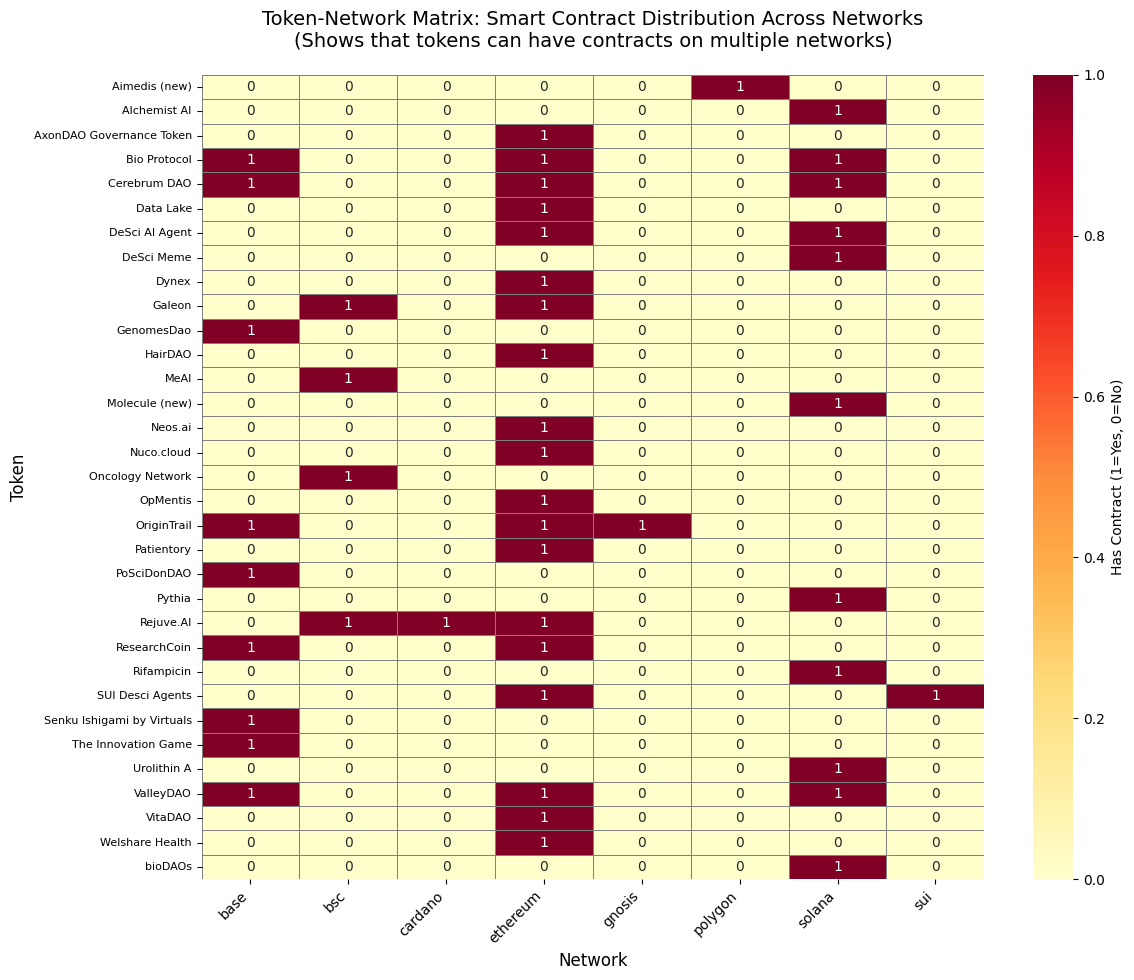

In [172]:
# Visualize the token-network matrix as a heatmap
# This clearly shows which tokens have smart contracts on which networks

plt.figure(figsize=(12, max(8, len(token_network_matrix) * 0.3)))
sns.heatmap(
    token_network_matrix,
    annot=True,
    fmt='d',
    cmap='YlOrRd',
    cbar_kws={'label': 'Has Contract (1=Yes, 0=No)'},
    linewidths=0.5,
    linecolor='gray',
    yticklabels=True,
    xticklabels=True
)
plt.title('Token-Network Matrix: Smart Contract Distribution Across Networks\n(Shows that tokens can have contracts on multiple networks)', 
          fontsize=14, pad=20)
plt.xlabel('Network', fontsize=12)
plt.ylabel('Token', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


Distribution of number of networks per token:
1    24
2     4
3     5
Name: count, dtype: int64

Average number of networks per token: 1.42
Maximum number of networks for a single token: 3


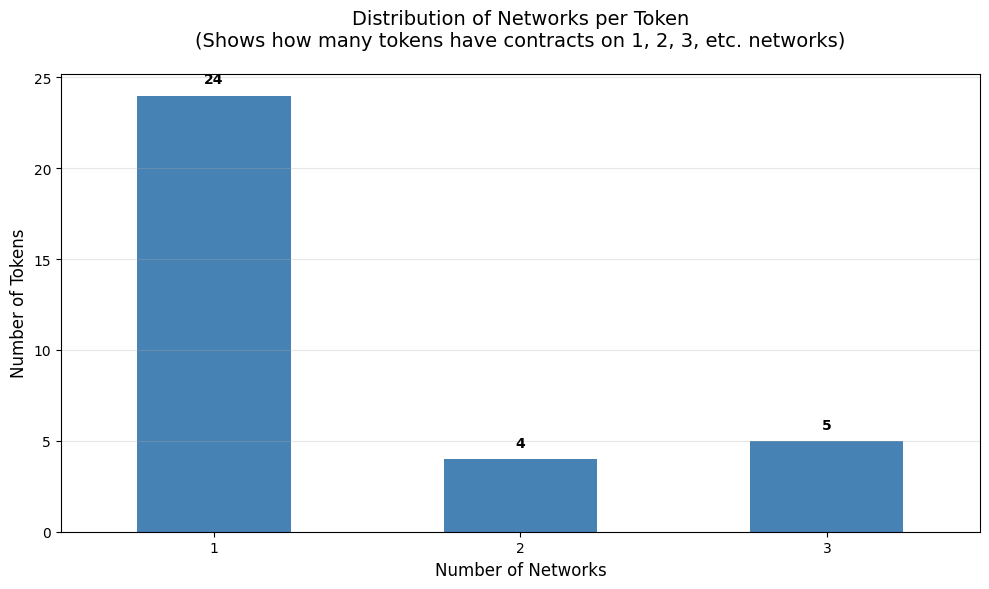

In [168]:
# Summary statistics: Show distribution of networks per token
network_counts_per_token = token_network_matrix.sum(axis=1)
network_distribution = network_counts_per_token.value_counts().sort_index()

print("Distribution of number of networks per token:")
print(network_distribution)
print(f"\nAverage number of networks per token: {network_counts_per_token.mean():.2f}")
print(f"Maximum number of networks for a single token: {network_counts_per_token.max()}")

# Visualize the distribution
plt.figure(figsize=(10, 6))
network_distribution.plot(kind='bar', color='steelblue')
plt.title('Distribution of Networks per Token\n(Shows how many tokens have contracts on 1, 2, 3, etc. networks)', 
          fontsize=14, pad=20)
plt.xlabel('Number of Networks', fontsize=12)
plt.ylabel('Number of Tokens', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(network_distribution):
    plt.text(i, v + 0.5, str(int(v)), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


## 3 Wallet Distribution Analysis
### 3.1 Data Preparation

In [135]:
# create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and wallets
# tokens can have multiple wallets
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    name = token["name"]
    symbol = token["symbol"]
    for wallet in token["wallets"]:
        clean_data.append({"name": name, "symbol": symbol, "wallet": wallet})

print(clean_data[:10])
# convert list of dictionaries to dataframe
wallet_df = pd.DataFrame(clean_data)
wallet_df.head()

# which token has multiple trust wallets?
wallet_df[wallet_df["wallet"] == "trust"].groupby("name").size().reset_index(
    name="count"
)[:10]

[{'name': 'OriginTrail', 'symbol': 'TRAC', 'wallet': 'metamask'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'wallet': 'binance'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'wallet': 'trust'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'trust'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'solflare'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'backpack'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'phantom'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'binance'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'jupiter'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'wallet': 'trust'}]


,name,count
0,Aimedis (new),1
1,Alchemist AI,1
2,AxonDAO Governance Token,1
3,Bio Protocol,1
4,Cerebrum DAO,1
5,Data Lake,1
6,DeSci AI Agent,1
7,DeSci Meme,1
8,Dynex,1
9,Galeon,1


### 3.2 Plot Visualization

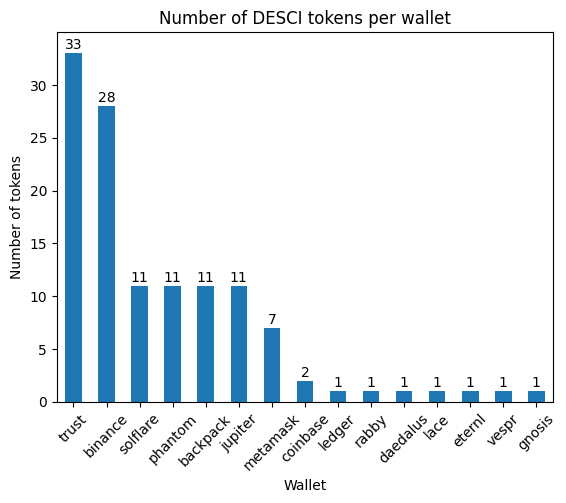

In [138]:
# create a bar chart of the number of tokens per wallet
wallet_df["wallet"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 35)
# y axis labels every 5
plt.yticks(range(0, 35, 5))
# add annotation to the bars
for i, v in enumerate(wallet_df["wallet"].value_counts()):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DESCI tokens per wallet")
plt.xlabel("Wallet")
plt.ylabel("Number of tokens")
plt.show()

### 3.3 Network-Wallet Heatmap Analysis


In [162]:
# Join network_df and wallet_df on symbol to get all network-wallet combinations per token
# This creates a cartesian product: each token's networks are paired with each token's wallets
network_wallet_joined = network_df.merge(
    wallet_df[["name", "wallet"]], on="name", how="inner"
)
# rename wallets with less than 5 tokens to "other"
network_wallet_joined["wallet"] = network_wallet_joined["wallet"].apply(
    lambda x: "other" if network_wallet_joined["wallet"].value_counts()[x] <5 else x
)
# rename networks with less than 10 tokens to "other"
network_wallet_joined["network"] = network_wallet_joined["network"].apply(
    lambda x: "other" if network_wallet_joined["network"].value_counts()[x] <10 else x
)

# Create a pivot table to count unique tokens (by symbol) for each network-wallet combination
# We use 'symbol' as the value to count, and count unique symbols
network_wallet_pivot = network_wallet_joined.groupby(["network", "wallet"])["symbol"].nunique().reset_index()
network_wallet_pivot.columns = ["network", "wallet", "token_count"]

# Create a pivot table for the heatmap
heatmap_data = network_wallet_pivot.pivot(index="network", columns="wallet", values="token_count").fillna(0)

print("Token counts by network and wallet:")
print(heatmap_data)

Token counts by network and wallet:
wallet    backpack  binance  coinbase  jupiter  metamask  other  phantom  \
network                                                                    
base           3.0      5.0       2.0      3.0       3.0    2.0      3.0   
bsc            0.0      4.0       0.0      0.0       1.0    1.0      0.0   
ethereum       4.0     19.0       2.0      4.0       7.0    4.0      4.0   
other          0.0      3.0       0.0      0.0       1.0    1.0      0.0   
solana        10.0     10.0       1.0     10.0       1.0    1.0     10.0   

wallet    solflare  trust  
network                    
base           3.0    9.0  
bsc            0.0    4.0  
ethereum       4.0   19.0  
other          0.0    4.0  
solana        10.0   10.0  


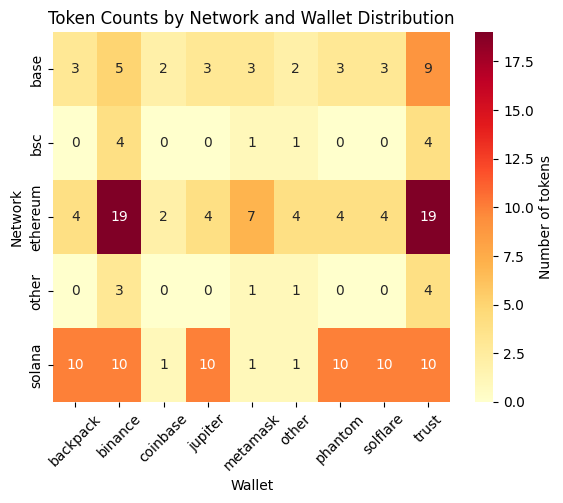

In [163]:
# Create 3D heatmap with seaborn
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    cbar_kws={"label": "Number of tokens"},
)
plt.title("Token Counts by Network and Wallet Distribution")
plt.xlabel("Wallet")
plt.ylabel("Network")
# rotate x axis labels 30 degrees
plt.xticks(rotation=45)

plt.show()

## 4. Auditor Distribution Analysis
### 4.1 Data Preparation

In [59]:
## create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and audits
# tokens can have multiple audits
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    name = token["name"]
    symbol = token["symbol"]
    for audit in token["audits"]:
        clean_data.append({"name": name, "symbol": symbol, "audit": audit})
    if len(token["audits"]) < 1:
        clean_data.append({"name": name, "symbol": symbol, "audit": "none"})
print(clean_data[:10])
# convert list of dictionaries to dataframe
auditor_df = pd.DataFrame(clean_data)
auditor_df.head()

[{'name': 'OriginTrail', 'symbol': 'TRAC', 'audit': 'quantstamp'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'audit': 'none'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'audit': 'none'}, {'name': 'Pythia', 'symbol': 'PYTHIA', 'audit': 'certik'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'audit': 'none'}, {'name': 'Galeon', 'symbol': 'GALEON', 'audit': 'certik'}, {'name': 'Dynex', 'symbol': 'DNX', 'audit': 'cyberscope'}, {'name': 'ValleyDAO', 'symbol': 'GROW', 'audit': 'none'}, {'name': 'Rifampicin', 'symbol': 'RIF', 'audit': 'none'}, {'name': 'Rejuve.AI', 'symbol': 'RJV', 'audit': 'hacken'}]


,name,symbol,audit
0,OriginTrail,TRAC,quantstamp
1,Bio Protocol,BIO,none
2,Alchemist AI,ALCH,none
3,Pythia,PYTHIA,certik
4,ResearchCoin,RSC,none


### 4.2 Plot Visualization

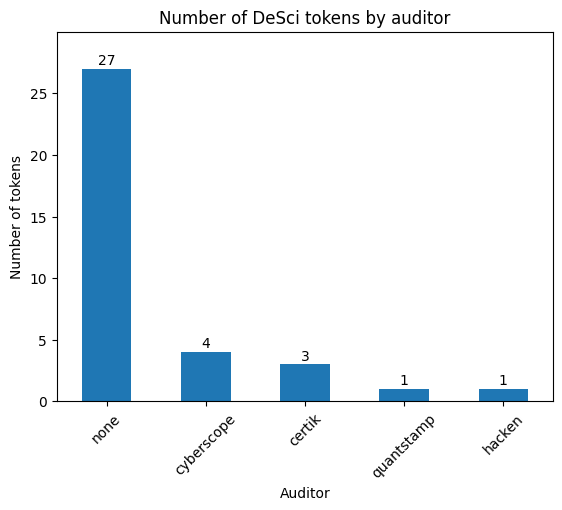

In [ ]:
# create a bar chart of the number of tokens per audit
auditor_df["audit"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 30)
# y axis labels every 5
plt.yticks(range(0, 30, 5))
# add annotation to the bars
for i, v in enumerate(auditor_df["audit"].value_counts()):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DeSci tokens by auditor")
plt.xlabel("Auditor")
plt.ylabel("Number of tokens")
plt.show()

## 5. Social Media Distribution Analysis
### 5.1 Data Preparation

In [ ]:
# create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and social media platforms
# tokens can have multiple social media platforms
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    name = token["name"]
    symbol = token["symbol"]
    for social in token["socials"]:
        clean_data.append({"name": name, "symbol": symbol, "social": social})

print(clean_data[:10])
# convert list of dictionaries to dataframe
social_df = pd.DataFrame(clean_data)
social_df.head()

[{'name': 'OriginTrail', 'symbol': 'TRAC', 'social': 'x'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'social': 'reddit'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'social': 'github'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'social': 'facebook'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'social': 'telegram'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'social': 'x'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'social': 'telegram'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'social': 'discord'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'social': 'x'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'social': 'telegram'}]


,name,symbol,social
0,OriginTrail,TRAC,x
1,OriginTrail,TRAC,reddit
2,OriginTrail,TRAC,github
3,OriginTrail,TRAC,facebook
4,OriginTrail,TRAC,telegram


### 5.2 Plot Visualization

Text(0.5, 0, 'Social Media Platform')

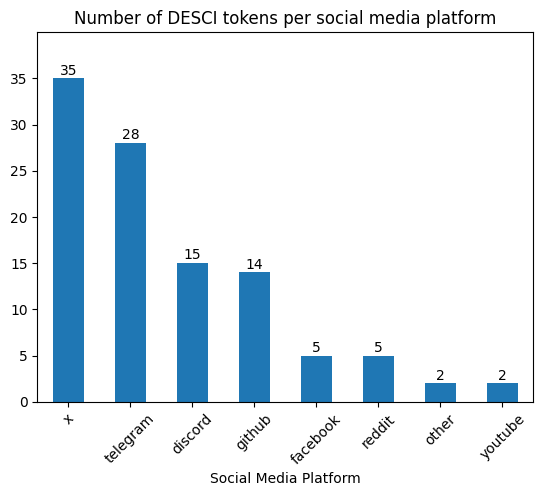

In [ ]:
# create a bar chart of the number of tokens per social media platform
# if the category count is 1, recategorize as "other"
social_df["social"] = social_df["social"].apply(
    lambda x: "other" if social_df["social"].value_counts()[x] == 1 else x
)
social_df["social"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 40)
# y axis labels every 5
plt.yticks(range(0, 40, 5))
# add annotation to the bars
for i, v in enumerate(social_df["social"].value_counts()):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DESCI tokens per social media platform")
plt.xlabel("Social Media Platform")

In [ ]:
# total number of unique token names
print("The total number of unique token names is: ", len(social_df["name"].unique()))

# which tokens have multiple X accounts?
# Group by 'name' and 'symbol', count the number of rows where 'social' is 'x'
x_accounts = (
    social_df[social_df["social"] == "x"]
    .groupby(["name", "symbol"])
    .size()
    .reset_index(name="count")
)
# Select only those with more than one account
multiple_x_accounts = x_accounts[x_accounts["count"] > 1]
print("Tokens with multiple X accounts:")
print(multiple_x_accounts)

The total number of unique token names is:  35
Tokens with multiple X accounts:
Empty DataFrame
Columns: [name, symbol, count]
Index: []


## 6. Explorers Distribution Analysis
### 6.1 Data Preparation

In [68]:
# create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and explorers
# tokens can have multiple explorers
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    name = token["name"]
    symbol = token["symbol"]
    for explorer in token["explorers"]:
        clean_data.append({"name": name, "symbol": symbol, "explorer": explorer})

# convert list of dictionaries to dataframe
explorer_df = pd.DataFrame(clean_data)
explorer_df.head()

,name,symbol,explorer
0,OriginTrail,TRAC,etherscan
1,OriginTrail,TRAC,nansen
2,OriginTrail,TRAC,ethplorer
3,Bio Protocol,BIO,etherscan
4,Bio Protocol,BIO,nansen


### 6.2 Plot Visualization

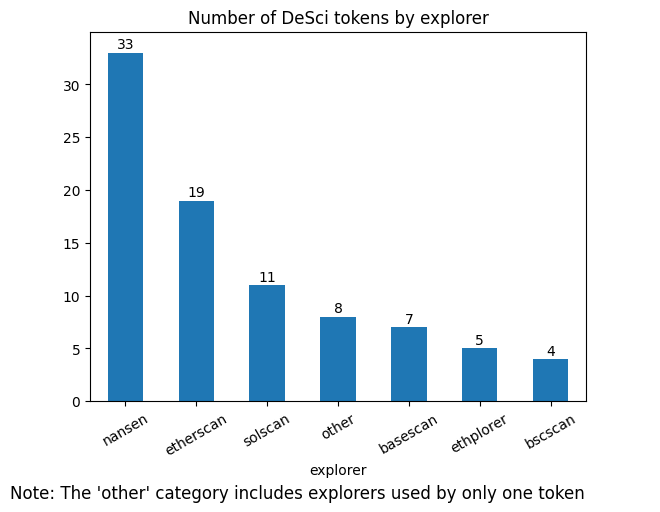

In [ ]:
# if the category count is 1, recategorize as "other"
explorer_df["explorer"] = explorer_df["explorer"].apply(
    lambda x: "other" if explorer_df["explorer"].value_counts()[x] == 1 else x
)
# create a bar chart of the number of tokens per explorer
explorer_df["explorer"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 35)
# y axis labels every 5
plt.yticks(range(0, 35, 5))
# add annotation to the bars
for i, v in enumerate(explorer_df["explorer"].value_counts()):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=30)
plt.title("Number of DeSci tokens by explorer")

# Add annotation note as a subplot below  the plot defining the "other" category
# Create a new subplot for the note
ax_note = plt.axes([0, 0, 1, 0.1])
ax_note.axis("off")
ax_note.text(
    0,
    -1,
    "Note: The 'other' category includes explorers used by only one token",
    ha="left",
    va="bottom",
    fontsize=12,
)

plt.show()